# Veri Seti_1 Sıcaklık Tahmini

Bu alıştırmada, Szeged, Macaristan bölgesindeki tarihi sıcaklık verileriyle çalışacaksınız.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

In [171]:
weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [172]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

# Veri Seti_1 Soru: 1

## Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.

In [173]:
Y = weather_df["Temperature (C)"]
X = weather_df[["Humidity","Wind Speed (km/h)","Pressure (millibars)"]]

In [174]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [175]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.24398999e+01 -1.94546893e-01 -7.15579969e-04]
Sabit değer (bias): 
 38.59379935054457


In [178]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                 2.314e+04
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        15:46:50   Log-Likelihood:            -3.2838e+05
No. Observations:               96453   AIC:                         6.568e+05
Df Residuals:                   96449   BIC:                         6.568e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   38.5938      0.231    167.305      0.000      38.142      39.046
Humidity               -32.4399      0.123   -263.447      0.000     -32.681     -32.199
Wind Speed (km/h)       -0.1945      0.003    -55.813      0.000      -0.201      -0.188
Pressure (millibars)    -0.0007      0.000     -3.565      0.000      -0.001      -0.000
==============================================================================
Omnibus:                     3420.508   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3852.043
Skew:                          -0.458   Prob(JB):                         0.00
Kurtosis:                       3.346   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Veri Seti_1 Soru: 2

## Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.

## Varsayım 1: Katsayılarda modelin doğrusallığı

## Varsayım 2: Hata terimi ortalamada sıfır olmalıdır

In [179]:
X = weather_df[["Humidity","Wind Speed (km/h)","Pressure (millibars)"]]
X

,Humidity,Wind Speed (km/h),Pressure (millibars)
0,0.89,14.1197,1015.13
1,0.86,14.2646,1015.63
2,0.89,3.9284,1015.94
3,0.83,14.1036,1016.41
4,0.83,11.0446,1016.51
...,...,...,...
96448,0.43,10.9963,1014.36
96449,0.48,10.0947,1015.16
96450,0.56,8.9838,1015.66
96451,0.60,10.5294,1015.95


In [180]:
sicaklik = np.array(weather_df["Temperature (C)"])
sicaklik

array([ 9.47222222,  9.35555556,  9.37777778, ..., 22.03888889,
       21.52222222, 20.43888889])

In [181]:
sicaklik_tahmin = lrm1.predict(X)
sicaklik_tahmin

array([ 6.24893798,  7.19358734,  8.23104411, ..., 17.95289908,
       16.35440388, 16.93506185])

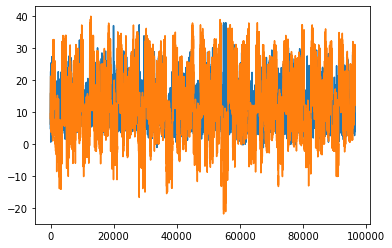

In [182]:
plt.plot(sicaklik_tahmin)
plt.plot(sicaklik);

In [183]:
hatalar = sicaklik - sicaklik_tahmin
print("Sıcaklık tahmin modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))
hatalar

Sıcaklık tahmin modelinin ortalama hatası : -0.000000000000002


array([3.22328425, 2.16196822, 1.14673367, ..., 4.08598981, 5.16781834,
       3.50382704])

Değerlendirme;
1. Modelde sabit terimi eklediğimizden, modelin hatalarının ortalaması sıfırdır.
2. Hataların toplamı sıfır olmalıdır ve sıfır çıktı.

# Varsayım 3: homoscedasticity

Üçüncü varsayım homoscedasticity gerekliliğidir. Bir model, hata koşullarının (scedasticity olarak bilinir) dağılımı, öngörülen tüm değerler için tutarlı olduğunda homoscedastictir. Başka bir deyişle, hata varyansı, gözlemler arasında sistematik olarak değişmemelidir. Bu varsayım karşılanmadığı zaman, heteroscesdastisity ile uğraşırız.

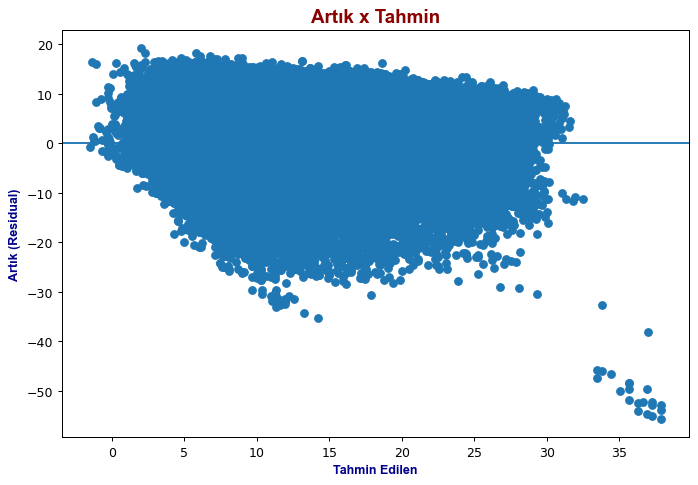

In [184]:
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(sicaklik_tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

1. Hataların varyanslarını, gözlemler arasında farklılık göstermektedir. 
2. Bu durumda graifkten yola çıkarak homoscedasticity değil diyebiliriz.
3. Homoscedasticity olup olmadığına istatistiksel olarakta bakabiliriz.
4. Bu testlerden ikisi Bartlett ve Levene testleridir. 
5. Her iki test için de null hipotez, hataların homoscedastic olmasıdır. 
6. Her iki test de scipy'nin stats modülünden alınabilir.

In [185]:
sicaklik_tahmin

array([ 6.24893798,  7.19358734,  8.23104411, ..., 17.95289908,
       16.35440388, 16.93506185])

In [186]:
hatalar

array([3.22328425, 2.16196822, 1.14673367, ..., 4.08598981, 5.16781834,
       3.50382704])

In [187]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(sicaklik_tahmin, hatalar)
lev_stats = levene(sicaklik_tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 2595.34 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2435.45 ve p değeri : 0.000000000000000000000


Değerlendirme,

1. Her iki testin p değerleri 0.05'ten düşüktür. 
2. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

# Varsayım 4: düşük çoklu doğrusallık/low multicollinearity

Çoklu doğrusallığı saptamak için, özelliklerin korelasyon matrisine bakabiliriz. Çoklu doğrusallık, PCA tarafından veya ilişkili bazı özelliklerin atılmasıyla giderilebilir.

# Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır

1. Hata terimleri birbiriyle ilişkisiz olmalıdır.
2. Bir gözlem için hata terimi, bir diğerinin hata süresini öngörmemelidir. 
3. Modelden ilgili bir değişkeni çıkarırsak, bu tür bir seri korelasyon olabilir. Dolayısıyla, bu değişkenin modele dahil edilmesi bu sorun için çözülebilir.
4. Hata koşullarının birbiriyle korele olup olmadığını belirlemek için bunları grafik olarak çizebiliriz. 
5. Grafikte rasgeleliğe dikkat etmeliyiz.

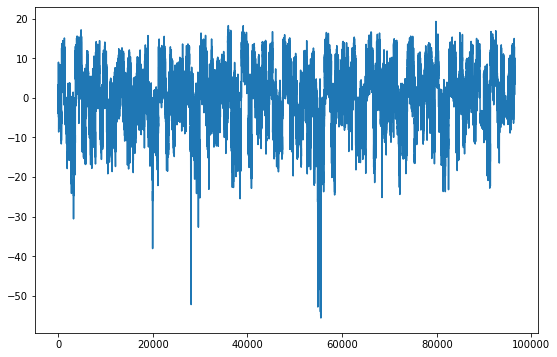

In [192]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

Değerlendirme,

1. Bizim modelimizin hata koşullarının birbiriyle korele olmadığı görülmektedir.
2. Bu durumu istatistiksel olarakta görebiliriz.
3. Hatalar arasındaki korelasyonlara bakmanın bir başka yolu da otokorelasyon fonksiyonunu kullanmaktır. 
4. Bu fonksiyon, bir değişkenin kendi ile korelasyonunu hesaplar.
5. Acf() fonksiyonunu statsmodels'den şu şekilde kullanabiliriz:

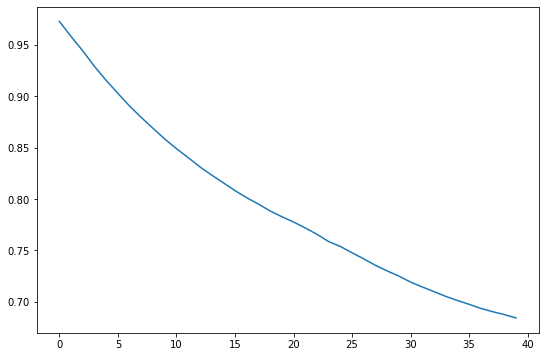

In [193]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

# Varsayım 6: özellikler hatalarla korele olmamalıdır

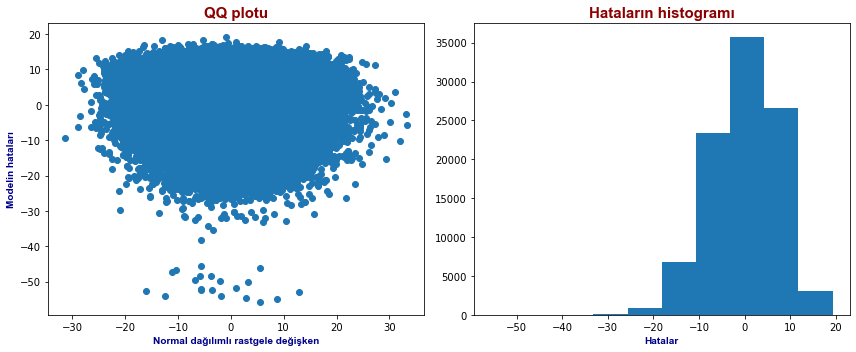

In [194]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [195]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [196]:
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 3852.0430009381294 ve p değeri : 0.0
Normal test değeri      : 3420.5077830836417  ve p değeri : 0.000000000000000000000000000000


Her iki testin p-değerleri, hatalarımızın normal olarak dağılmadığını gösterir.

# 2. Ev fiyatları

In [3]:
# df = house_prices_df
df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Varsayım 1: Katsayılarda modelin doğrusallığı

## Varsayım 2: Hata terimi ortalamada sıfır olmalıdır

In [20]:
Y3 = df["SalePrice"]
X3 = df[["OverallQual","GrLivArea","GarageCars"]]

In [21]:
lrm3 = linear_model.LinearRegression()
lrm3.fit(X3, Y3)

LinearRegression()

In [22]:
X3

,OverallQual,GrLivArea,GarageCars
0,7,1710,2
1,6,1262,2
2,7,1786,2
3,7,1717,3
4,8,2198,3
...,...,...,...
1455,6,1647,2
1456,6,2073,2
1457,7,2340,1
1458,5,1078,1


In [24]:
print('Değişkenler: \n', lrm3.coef_)
print('Sabit değer (bias): \n', lrm3.intercept_)

Değişkenler: 
 [27104.82597153    50.67421142 21298.95976754]
Sabit değer (bias): 
 -98832.49325495985


In [18]:
X3 = sm.add_constant(X3)
results = sm.OLS(Y3, X3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1375.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        08:28:44   Log-Likelihood:                -17563.
No. Observations:                1460   AIC:                         3.513e+04
Df Residuals:                    1456   BIC:                         3.516e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.883e+04   4842.897    -20.408      0.000   -1.08e+05   -8.93e+04
OverallQual   2.71e+04   1072.182     25.280      0.000     2.5e+04    2.92e+04
GrLivArea      50.6742      2.552     19.859      0.000      45.669      55.680
GarageCars    2.13e+04   1807.065     11.786      0.000    1.78e+04    2.48e+04
==============================================================================
Omnibus:                      419.972   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9575.801
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                      15.447   Cond. No.                     7.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
ev_fiyat_tahmin = lrm3.predict(X3)
ev_fiyat_tahmin

array([220152.10960477, 170345.2369182 , 224003.3496725 , ...,
       230777.90303025, 112617.3962783 , 121637.40591062])

In [25]:
ev_fiyat = np.array(df["SalePrice"])
ev_fiyat

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [31]:
hatalar2 = ev_fiyat - ev_fiyat_tahmin
print("ev_fiyat tahmin modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar2)))
hatalar

ev_fiyat tahmin modelinin ortalama hatası : 0.000000000032214


array([-11652.10960477,  11154.7630818 ,   -503.3496725 , ...,
        35722.09696975,  29507.6037217 ,  25862.59408938])

Değerlendirme;
1. Modelde sabit terimi eklediğimizden, modelin hatalarının ortalaması sıfırdır.
2. Hataların toplamı sıfır olmalıdır ve sıfır çıktı.

# Varsayım 3: homoscedasticity

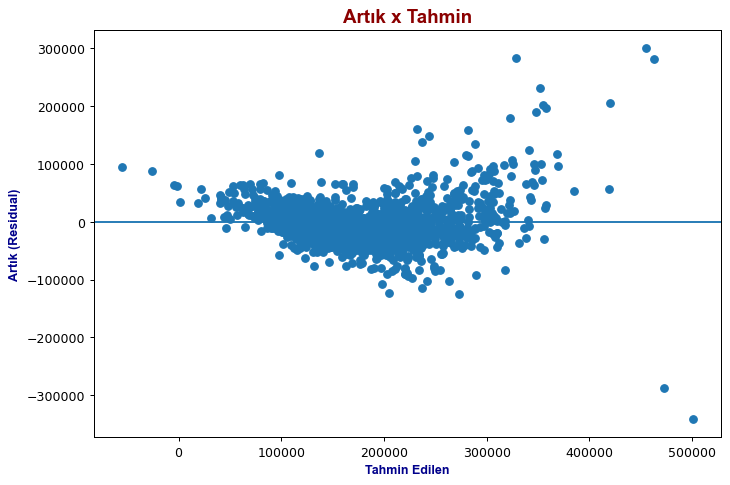

In [32]:
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(ev_fiyat_tahmin, hatalar2)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

1. Hataların varyanslarını, gözlemler arasında farklılık göstermektedir. 
2. Bu durumda graifkten yola çıkarak homoscedasticity değil diyebiliriz.
3. Homoscedasticity olup olmadığına istatistiksel olarakta bakabiliriz.
4. Bu testlerden ikisi Bartlett ve Levene testleridir. 
5. Her iki test için de null hipotez, hataların homoscedastic olmasıdır. 
6. Her iki test de scipy'nin stats modülünden alınabilir.

In [33]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(ev_fiyat_tahmin, hatalar2)
lev_stats = levene(ev_fiyat_tahmin, hatalar2)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 378.583 ve p değeri : 0.000000000000000000000
Levene test değeri   : 414.195 ve p değeri : 0.000000000000000000000


Değerlendirme,

1. Her iki testin p değerleri 0.05'ten düşüktür. 
2. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

# Varsayım 4: düşük çoklu doğrusallık/low multicollinearity

# Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır

1. Hata terimleri birbiriyle ilişkisiz olmalıdır.
2. Bir gözlem için hata terimi, bir diğerinin hata süresini öngörmemelidir. 
3. Modelden ilgili bir değişkeni çıkarırsak, bu tür bir seri korelasyon olabilir. Dolayısıyla, bu değişkenin modele dahil edilmesi bu sorun için çözülebilir.
4. Hata koşullarının birbiriyle korele olup olmadığını belirlemek için bunları grafik olarak çizebiliriz. 
5. Grafikte rasgeleliğe dikkat etmeliyiz.

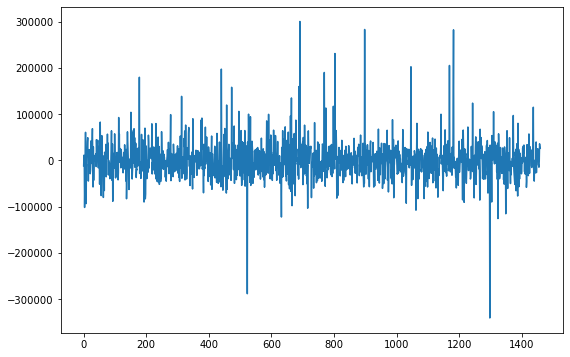

In [34]:
plt.figure(figsize=(9,6))
plt.plot(hatalar2)
plt.show()

Değerlendirme,

1. Bizim modelimizin hata koşullarının birbiriyle korele olmadığı görülmektedir.
2. Bu durumu istatistiksel olarakta görebiliriz.
3. Hatalar arasındaki korelasyonlara bakmanın bir başka yolu da otokorelasyon fonksiyonunu kullanmaktır. 
4. Bu fonksiyon, bir değişkenin kendi ile korelasyonunu hesaplar.
5. Acf() fonksiyonunu statsmodels'den şu şekilde kullanabiliriz:

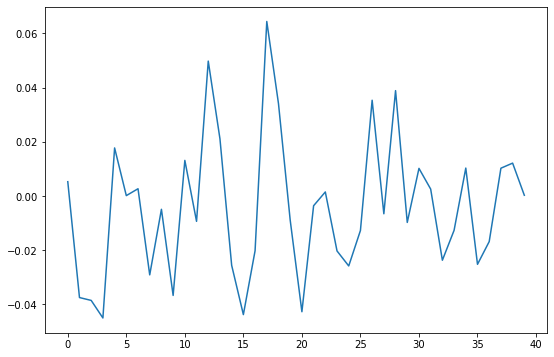

In [35]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar2)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

# Varsayım 6: özellikler hatalarla korele olmamalıdır

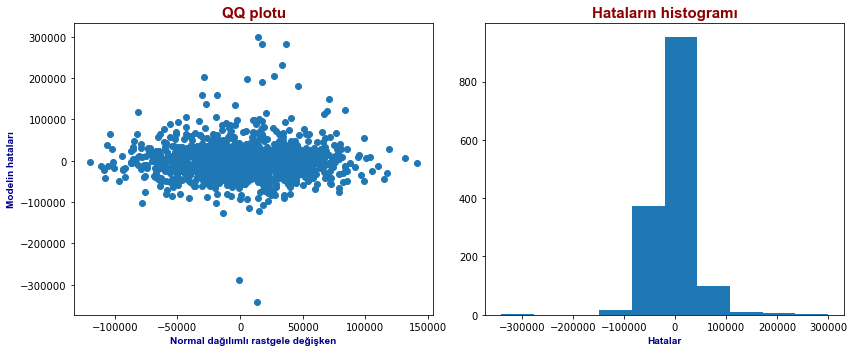

In [36]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar2)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(hatalar2)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [37]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [38]:
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 9575.800696049915 ve p değeri : 0.0
Normal test değeri      : 419.97175163655226  ve p değeri : 0.000000000000000000000000000000


Her iki testin p-değerleri, hatalarımızın normal olarak dağılmadığını gösterir.